# Solutions to sheet 7

Import the necessary libraries: `numpy`, `matplotlib`. We can use the `as` keyword to define shortcuts to access the libraries (example: `import numpy as np` means we can access numpy functions with the `np.` syntax).

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt

In [4]:
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      plotting properties
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

mpl.rcParams.update({
    "axes.autolimit_mode":"round_numbers",
    "axes.axisbelow":"False",
    "axes.edgecolor":"000000",
    "axes.facecolor":"FFFFFF",
    "axes.formatter.limits":"-2, 4",
    "axes.formatter.use_mathtext":"True",
    "axes.grid":"False",
    "axes.labelcolor":"000000",
    "axes.labelsize":"12",
    "axes.linewidth":"1",
    "axes.titlesize":"12",
    "axes.xmargin":"0.",
    "axes.ymargin":"0.",
    "errorbar.capsize":"1",
    "figure.autolayout":"True",
    "figure.dpi":"96",
    "figure.edgecolor":"0.50",
    "figure.facecolor":"FFFFFF",
    "figure.figsize":"6, 4.5",
    "font.family":"monospace",
    "font.size":"12",
    "legend.fancybox":"True",
    "legend.framealpha":"0.25",
    "legend.frameon":"True",
    "lines.markersize":"6",
    "savefig.dpi":"150",
    "savefig.facecolor":"FFFFFF00",
    "xtick.bottom":"True",
    "xtick.color":"000000",
    "xtick.direction":"in",
    "xtick.major.size":"10",
    "xtick.minor.size":"5",
    "xtick.top":"True",
    "ytick.color":"000000",
    "ytick.direction":"in",
    "ytick.left":"True",
    "ytick.major.size":"10",
    "ytick.minor.size":"5",
    "ytick.right":"True",
})

## Dataset

This is the dataset we receive: lists of bin centres and bin contents.

In [5]:
interval = (-5, 2)

In [6]:
x = np.array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5, 1.5])

In [7]:
y = np.array([0.3, 1.0, 0.9, 3.1, 6.9, 6.5, 1.7])

In [8]:
yerrs = np.array([0.2, 0.3, 0.4, 0.4, 0.5, 0.3, 0.2])

## Implementation of Crystal Ball and Gauss

In [9]:
def CrystalBall(x, beta, m, mu, sigma, norm):
    """Takes x values and evaluates Crystal Ball at that point."""
    return norm * stats.crystalball.pdf(x, beta=beta, m=m, loc=mu, scale=sigma)

In [10]:
def Gaussian(x, mu, sigma, norm):
    """Takes x values and evaluates Gaussian at that point."""
    return norm * stats.norm.pdf(x, loc=mu, scale=sigma)

## Plotting the functions

In [11]:
xfunc = np.linspace(*interval, 200)

In [12]:
beta=1
m=3

In [13]:
yfunc_cb = CrystalBall(xfunc, beta=beta, m=m, mu=0, sigma=1, norm=1)

In [14]:
yfunc_gauss = Gaussian(xfunc, mu=0, sigma=1, norm=1)

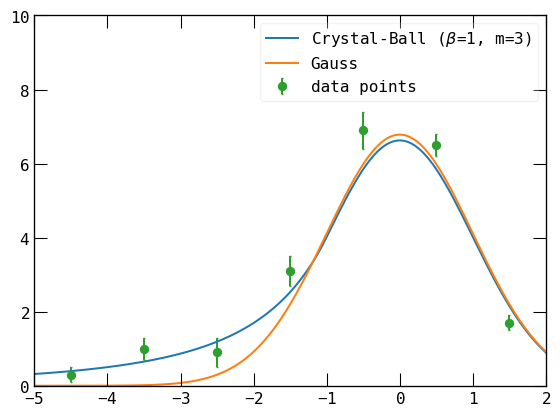

In [15]:
plt.plot(xfunc, yfunc_cb * 20, label=rf"Crystal-Ball ($\beta$={beta}, m={m})")
plt.plot(xfunc, yfunc_gauss * 17, label="Gauss")
plt.errorbar(x, y, yerr=yerrs, label="data points", fmt="o")
plt.ylim([0, 10])
plt.legend()

plt.show()

## Defining a chi2 function

In [16]:
def calc_chi2(x, y, yerrs, func, params):
    """Calculates chi2 of x, y dataset w.r.t. to given function."""
    chi2 = 0
    for i in range(len(x)):
        fct_value = func(x[i], *params)
        chi2 += np.power((y[i] - fct_value) / yerrs[i], 2)
    return chi2

## Fitting a Gaussian function

In [17]:
params, cov = opt.curve_fit(Gaussian, x, y, sigma=yerrs, p0=[0, 1, 16])

In [18]:
params

array([-0.15725706,  0.97359204, 19.14230139])

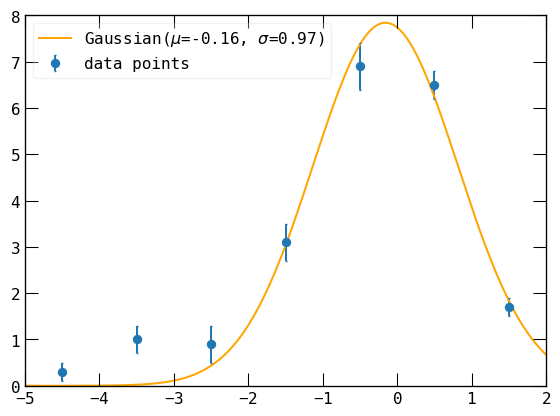

In [19]:
plt.plot(xfunc, Gaussian(xfunc, *params), color="orange", label=rf"Gaussian($\mu$={params[0]:.2f}, $\sigma$={params[1]:.2f})")
plt.errorbar(x, y, yerr=yerrs, label="data points", fmt="o")
plt.legend()

plt.show()

In [20]:
chi2_gauss = calc_chi2(x, y, yerrs, Gaussian, params)

In [21]:
chi2_gauss

16.388203416719744

## Fitting a Crystal Ball function

In [22]:
params, cov = opt.curve_fit(CrystalBall, x, y, sigma=yerrs, p0=[1, 3, 0, 1, 15])

In [23]:
params

array([ 0.84585298,  5.41426913, -0.0536644 ,  0.88762196, 21.15292286])

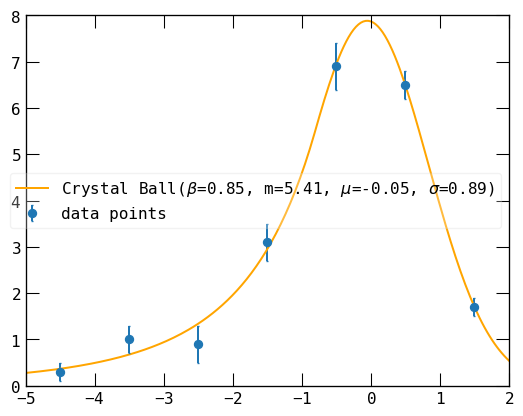

In [24]:
plt.plot(xfunc, CrystalBall(xfunc, *params), color="orange", label=rf"Crystal Ball($\beta$={params[0]:.2f}, m={params[1]:.2f}, $\mu$={params[2]:.2f}, $\sigma$={params[3]:.2f})")
plt.errorbar(x, y, yerr=yerrs, label="data points", fmt="o")
plt.legend()

plt.show()

In [25]:
chi2_cb = calc_chi2(x, y, yerrs, CrystalBall, params)

In [26]:
chi2_cb

2.656539248804886

## Comparison with chi2 distribution

In [27]:
print(f"Gauss: chi2 = {chi2_gauss:.2f}, quantile = {stats.chi2.cdf(chi2_gauss, 7 - 3):.3f}")

Gauss: chi2 = 16.39, quantile = 0.997


In [28]:
print(f"Crystal Ball: chi2 = {chi2_cb:.2f}, quantile = {stats.chi2.cdf(chi2_cb, 7 - 5):.3f}")

Crystal Ball: chi2 = 2.66, quantile = 0.735
